# [Lecture 4 demo](https://python-public-policy.afeld.me/en/columbia/lecture_4.html#congestion-pricing-demo) solution

Ensure the visualizations [render](https://plotly.com/python/renderers/) properly across VSCode, Jupyter Book, etc. You can ignore this.

In [1]:
import plotly.io as pio

pio.renderers.default = "notebook_connected+plotly_mimetype"

In [2]:
import pandas as pd

entries = pd.read_csv(
    "https://data.ny.gov/resource/t6yz-b64h.csv?$limit=300000&$order=toll_10_minute_block",
    parse_dates=["toll_date", "toll_hour", "toll_10_minute_block", "toll_week"],
    date_format="ISO8601",
)
entries

,toll_date,toll_hour,toll_10_minute_block,minute_of_hour,hour_of_day,day_of_week_int,day_of_week,toll_week,time_period,vehicle_class,detection_group,detection_region,crz_entries,excluded_roadway_entries
0,2025-01-05,2025-01-05 00:00:00,2025-01-05 00:00:00,0,0,1,Sunday,2025-01-05,Overnight,"1 - Cars, Pickups and Vans",Brooklyn Bridge,Brooklyn,98,95
1,2025-01-05,2025-01-05 00:00:00,2025-01-05 00:00:00,0,0,1,Sunday,2025-01-05,Overnight,"1 - Cars, Pickups and Vans",Hugh L. Carey Tunnel,Brooklyn,17,22
2,2025-01-05,2025-01-05 00:00:00,2025-01-05 00:00:00,0,0,1,Sunday,2025-01-05,Overnight,"1 - Cars, Pickups and Vans",Manhattan Bridge,Brooklyn,96,0
3,2025-01-05,2025-01-05 00:00:00,2025-01-05 00:00:00,0,0,1,Sunday,2025-01-05,Overnight,"1 - Cars, Pickups and Vans",Williamsburg Bridge,Brooklyn,138,0
4,2025-01-05,2025-01-05 00:00:00,2025-01-05 00:00:00,0,0,1,Sunday,2025-01-05,Overnight,"1 - Cars, Pickups and Vans",East 60th St,East 60th St,208,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,2025-02-02,2025-02-02 22:00:00,2025-02-02 22:20:00,20,22,1,Sunday,2025-02-02,Overnight,4 - Buses,Lincoln Tunnel,New Jersey,1,0
299996,2025-02-02,2025-02-02 22:00:00,2025-02-02 22:20:00,20,22,1,Sunday,2025-02-02,Overnight,4 - Buses,Queens Midtown Tunnel,Queens,3,0
299997,2025-02-02,2025-02-02 22:00:00,2025-02-02 22:20:00,20,22,1,Sunday,2025-02-02,Overnight,4 - Buses,Queensboro Bridge,Queens,3,0
299998,2025-02-02,2025-02-02 22:00:00,2025-02-02 22:20:00,20,22,1,Sunday,2025-02-02,Overnight,4 - Buses,West 60th St,West 60th St,5,0


Only keep columns that are needed:

In [3]:
entries_minimal = entries[["toll_10_minute_block", "vehicle_class", "crz_entries"]]
entries_minimal

,toll_10_minute_block,vehicle_class,crz_entries
0,2025-01-05 00:00:00,"1 - Cars, Pickups and Vans",98
1,2025-01-05 00:00:00,"1 - Cars, Pickups and Vans",17
2,2025-01-05 00:00:00,"1 - Cars, Pickups and Vans",96
3,2025-01-05 00:00:00,"1 - Cars, Pickups and Vans",138
4,2025-01-05 00:00:00,"1 - Cars, Pickups and Vans",208
...,...,...,...
299995,2025-02-02 22:20:00,4 - Buses,1
299996,2025-02-02 22:20:00,4 - Buses,3
299997,2025-02-02 22:20:00,4 - Buses,3
299998,2025-02-02 22:20:00,4 - Buses,5


In [4]:
entries_by_10_min = (
    entries_minimal.groupby("toll_10_minute_block").sum(numeric_only=True).reset_index()
)
entries_by_10_min

,toll_10_minute_block,crz_entries
0,2025-01-05 00:00:00,2713
1,2025-01-05 00:10:00,2646
2,2025-01-05 00:20:00,2564
3,2025-01-05 00:30:00,2405
4,2025-01-05 00:40:00,2405
...,...,...
4162,2025-02-02 21:40:00,2819
4163,2025-02-02 21:50:00,2768
4164,2025-02-02 22:00:00,2395
4165,2025-02-02 22:10:00,2542


In [5]:
import plotly.express as px

fig = px.line(
    entries_by_10_min,
    x="toll_10_minute_block",
    y="crz_entries",
    title="Entries to the Congestion Relief Zone",
)
fig.show()

## [Resampling](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/09_timeseries.html#resample-a-time-series-to-another-frequency)

In [6]:
weekly_entries = entries_minimal.resample("W-SUN", on="toll_10_minute_block").sum()
weekly_entries

,vehicle_class,crz_entries
toll_10_minute_block,,
2025-01-05,"1 - Cars, Pickups and Vans1 - Cars, Pickups an...",417949
2025-01-12,"1 - Cars, Pickups and Vans1 - Cars, Pickups an...",3249482
2025-01-19,"1 - Cars, Pickups and Vans1 - Cars, Pickups an...",3279601
2025-01-26,"1 - Cars, Pickups and Vans1 - Cars, Pickups an...",3311979
2025-02-02,"1 - Cars, Pickups and Vans1 - Cars, Pickups an...",3376205


In [7]:
weekly_entries.index.name = "date"
weekly_entries

,vehicle_class,crz_entries
date,,
2025-01-05,"1 - Cars, Pickups and Vans1 - Cars, Pickups an...",417949
2025-01-12,"1 - Cars, Pickups and Vans1 - Cars, Pickups an...",3249482
2025-01-19,"1 - Cars, Pickups and Vans1 - Cars, Pickups an...",3279601
2025-01-26,"1 - Cars, Pickups and Vans1 - Cars, Pickups an...",3311979
2025-02-02,"1 - Cars, Pickups and Vans1 - Cars, Pickups an...",3376205


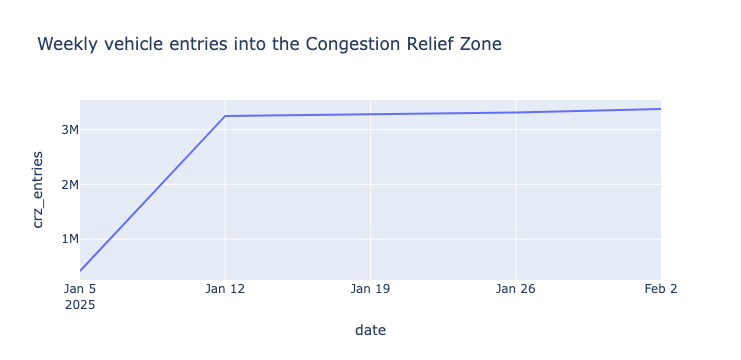

In [8]:
fig = px.line(
    weekly_entries,
    # x="date", # not needed, since it's the index
    y="crz_entries",
    title="Weekly vehicle entries into the Congestion Relief Zone",
)
fig.show()

## Rolling average

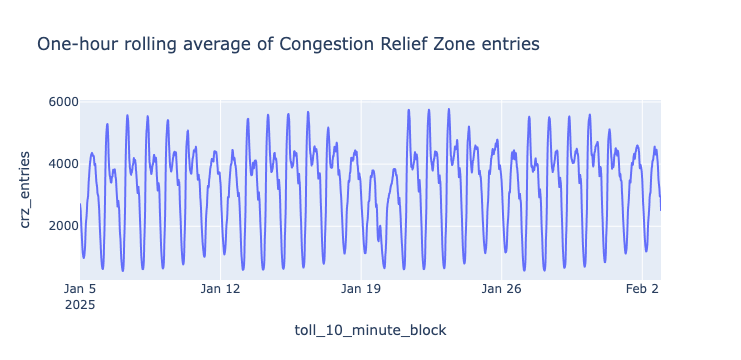

In [9]:
entries_by_10_min_rolling = entries_by_10_min.rolling(
    "1h", on="toll_10_minute_block"
).mean()

fig = px.line(
    entries_by_10_min_rolling,
    x="toll_10_minute_block",
    y="crz_entries",
    title="One-hour rolling average of Congestion Relief Zone entries",
)
fig.show()

Let's try a bigger window:

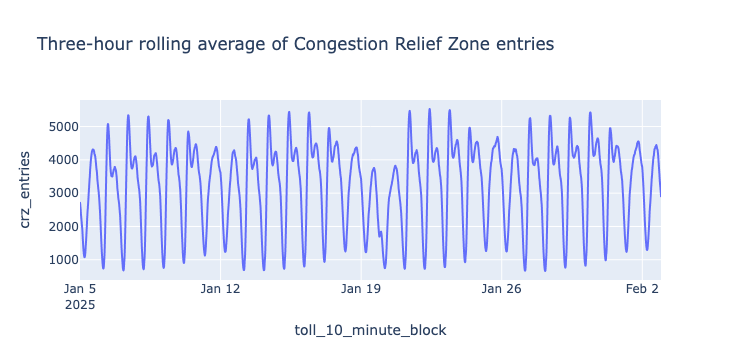

In [10]:
entries_by_10_min_rolling = entries_by_10_min.rolling(
    "3h", on="toll_10_minute_block"
).mean()

fig = px.line(
    entries_by_10_min_rolling,
    x="toll_10_minute_block",
    y="crz_entries",
    title="Three-hour rolling average of Congestion Relief Zone entries",
)
fig.show()

## Resampling with other grouping

In [11]:
entries_by_loc = entries_minimal.groupby(
    [
        pd.Grouper(key="toll_10_minute_block", freq="D"),
        "vehicle_class",
    ]
).sum()

entries_by_loc

crz_entries
toll_10_minute_block vehicle_class                          
2025-01-05           1 - Cars, Pickups and Vans       253911
                     2 - Single-Unit Trucks             5151
                     3 - Multi-Unit Trucks               702
                     4 - Buses                          3480
                     5 - Motorcycles                    1486
...                                                      ...
2025-02-02           2 - Single-Unit Trucks             5091
                     3 - Multi-Unit Trucks               560
                     4 - Buses                          3847
                     5 - Motorcycles                    1263
                     TLC Taxi/FHV                     162552

[174 rows x 1 columns]

In [12]:
entries_by_loc = entries_by_loc.reset_index()
entries_by_loc = entries_by_loc.rename(columns={"toll_10_minute_block": "date"})

fig = px.line(
    entries_by_loc,
    x="date",
    y="crz_entries",
    color="vehicle_class",
    title="Three-hour rolling average of Congestion Relief Zone entries",
)
fig.show()

## [Filtering timestamps](https://www.geeksforgeeks.org/select-pandas-dataframe-rows-between-two-dates/)

In [13]:
start = entries["toll_10_minute_block"].min()
start

Timestamp('2025-01-05 00:00:00')

In [14]:
end = start + pd.Timedelta(1, "w")
end

Timestamp('2025-01-12 00:00:00')

In [15]:
entries_first_week = entries[entries["toll_10_minute_block"] < end]
entries_first_week["crz_entries"].sum()

np.int64(3247304)